# **Laboratorijska vježba 6**: Zadaci za samostalni rad

## **Predviđanje preživaljvanja u potopu Titanika**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o putnicima Titanika te informaciju jesu li preživjeli potop. Ovaj skup podataka jedan od najpopularnijih skupova na stranici Kaggle jer dobro služi za uvođenje u rješavanje problema klasifikacije. Skup podataka sadrži sljedeće značajke:

* name - naziv putnika
* sex - spol putnika
* dob - dob putnika
* sibsp - broj braće/sestara/supružnika putnika na brodu
* parch - broj roditelja/djece putnika na brodu
* ticket - broj karte putnika
* fare - cijena karte putnika
* cabin - broj kabine putnika
* embarked - luka ukrcaja putnika

te izlaznu varijablu:

* survived - informacija je li putnik preživio katastrofu ili ne.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head(5)

survived     name                                  surname     sex  \
0         1    Allen                   Miss. Elisabeth Walton  female   
1         1  Allison                    Master. Hudson Trevor    male   
2         0  Allison                      Miss. Helen Loraine  female   
3         0  Allison              Mr. Hudson Joshua Creighton    male   
4         0  Allison   Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  
0  29.0000      0      0   24160  211.3375       B5        S  
1   0.9167      1      2  113781  151.5500  C22 C26        S  
2   2.0000      1      2  113781  151.5500  C22 C26        S  
3  30.0000      1      2  113781  151.5500  C22 C26        S  
4  25.0000      1      2  113781  151.5500  C22 C26        S

In [ ]:
print(titanic['survived'].dtypes)

int64


## **Zadatak 1: Istraživanje skupa podataka**

Istražite skup podataka na način da izračunate deskriptivnu statistiku za izlaznu varijablu. Prokomentirajte koji je udio preživjelih u potonuću Titanika.

In [ ]:
# Mjesto za Vaš kod
print(titanic.describe())
print("\nPercentage of survived: ", titanic['survived'].sum()/titanic['survived'].count())

          survived          age        sibsp        parch         fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      0.381971    29.881135     0.498854     0.385027    33.295479
std       0.486055    14.413500     1.041658     0.865560    51.758668
min       0.000000     0.166700     0.000000     0.000000     0.000000
25%       0.000000    21.000000     0.000000     0.000000     7.895800
50%       0.000000    28.000000     0.000000     0.000000    14.454200
75%       1.000000    39.000000     1.000000     0.000000    31.275000
max       1.000000    80.000000     8.000000     9.000000   512.329200

Percentage of survived:  0.3819709702062643


Približno je 38% preživjelih na titanicu

Nacrtajte dijagram raspršenosti između izlazne varijable i svakog pojedinog stupca u skupu podataka. Pomoć: možete koristiti matricu dijagrama raspršenosti iz biblioteke pandas.

array([[<Axes: xlabel='survived', ylabel='survived'>,
        <Axes: xlabel='age', ylabel='survived'>,
        <Axes: xlabel='sibsp', ylabel='survived'>,
        <Axes: xlabel='parch', ylabel='survived'>,
        <Axes: xlabel='fare', ylabel='survived'>],
       [<Axes: xlabel='survived', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sibsp', ylabel='age'>,
        <Axes: xlabel='parch', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>],
       [<Axes: xlabel='survived', ylabel='sibsp'>,
        <Axes: xlabel='age', ylabel='sibsp'>,
        <Axes: xlabel='sibsp', ylabel='sibsp'>,
        <Axes: xlabel='parch', ylabel='sibsp'>,
        <Axes: xlabel='fare', ylabel='sibsp'>],
       [<Axes: xlabel='survived', ylabel='parch'>,
        <Axes: xlabel='age', ylabel='parch'>,
        <Axes: xlabel='sibsp', ylabel='parch'>,
        <Axes: xlabel='parch', ylabel='parch'>,
        <Axes: xlabel='fare', ylabel='parch'>],
       [<Axes: xlabel='survived

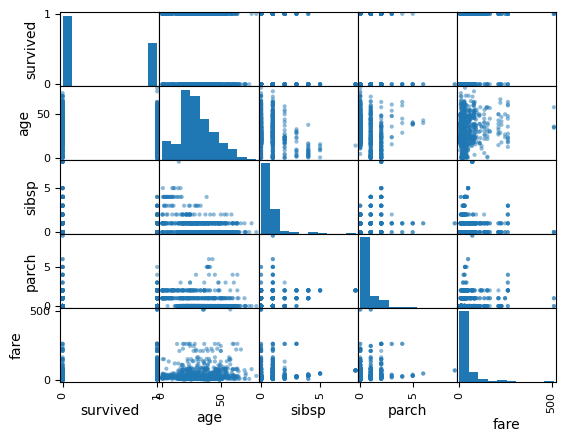

In [ ]:
# Mjesto za Vaš kod
pd.plotting.scatter_matrix(titanic)

Odaberite značajke koje su po Vašem mišljenju bitne za klasifikaciju preživjelih i preminulih putnika. Kategoričke stupce pretvorite u numeričke pomoću *get_dummies()* funkcije iz biblioteke pandas. Provjerite ima li nedostajućih vrijednosti u nekom od stupaca te ih popunite na prikladan način (prosječna vrijednost, medijan, najčešća vrijednost,...). 

In [ ]:
# Mjesto za Vaš kod
print("Total number on isnull for each column:\n", titanic.isnull().sum())
print("Number of rows in dataframe: ", len(titanic))

titanic['sex'] = pd.get_dummies(titanic['sex'], drop_first=True) 
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].mean())
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic = titanic.drop(['cabin'], axis=1)
titanic = titanic.dropna()

print("\nTotal number on isnull for each column:\n", titanic.isnull().sum())
print("Number of rows in dataframe after fill and drop: ", len(titanic))

Total number on isnull for each column:
 survived       0
name           0
surname        0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64
Number of rows in dataframe:  1309

Total number on isnull for each column:
 survived    0
name        0
surname     0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64
Number of rows in dataframe after fill and drop:  1307


Zatim podijelite skup podataka na trening i test (u omjeru 70-30). Pripazite na to da u podskupovima za trening i test bude jednak **omjer** preživjelih i preminulih putnika.

In [ ]:
# Mjesto za Vaš kod
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
print(np.bincount(y_train))
print(np.bincount(y_test))
print("% of dead in train: ", 100*(np.bincount(y_train)[1]/(np.bincount(y_train)[0]+np.bincount(y_train)[1])))
print("% of dead in test: ", 100*(np.bincount(y_test)[1]/(np.bincount(y_test)[0]+np.bincount(y_test)[1])))

[566 350]
[243 150]
% of dead in train:  38.209606986899566
% of dead in test:  38.16793893129771


## **Zadatak 2: Logistička regresija**

Na podskupu za trening istrenirajte model algoritma logističke regresije. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test. 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


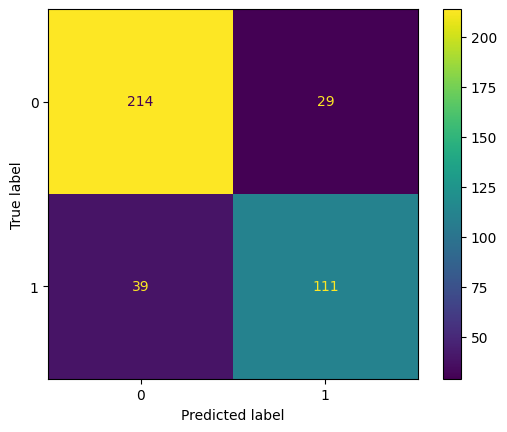

Train: 
Accuracy:  0.898471615720524
Precision:  0.9240924092409241
Recall:  0.8
F1:  0.8575803981623279
Test: 
Accuracy:  0.8269720101781171
Precision:  0.7928571428571428
Recall:  0.74
F1:  0.7655172413793102


In [ ]:
# Mjesto za Vaš kod
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_predicted_test = model.predict(X_test)
y_predicted_train = model.predict(X_train)

cm = confusion_matrix(y_test, y_predicted_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print("Train: ")
print("Accuracy: ", accuracy_score(y_train, y_predicted_train))
print("Precision: ", precision_score(y_train, y_predicted_train))
print("Recall: ", recall_score(y_train, y_predicted_train))
print("F1: ", f1_score(y_train, y_predicted_train))

print("Test: ")
print("Accuracy: ", accuracy_score(y_test, y_predicted_test))
print("Precision: ", precision_score(y_test, y_predicted_test))
print("Recall: ", recall_score(y_test, y_predicted_test))
print("F1: ", f1_score(y_test, y_predicted_test))

Logistička regresija koristi prag vjerojatnosti kako bi odlučila u koju klasu treba svrstati primjerak. U nekim slučajevima, želimo razumjeti kako se model ponaša na različitim razinama ovog praga. Iscrtajte ROC krivulju na temelju stvarnih vrijednosti izlazne varijable i predviđenih vjerojatnosti oznaka klasa koje daje logistička regresija (*predict_proba*). Izračunajte površinu ispod krivulje, odnosno vrijednost mjere AUC. 

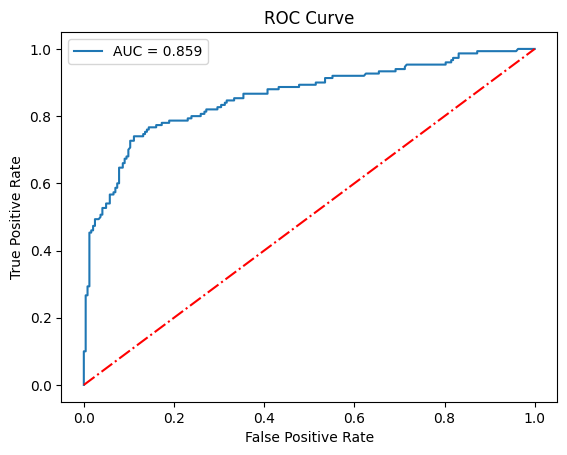

In [ ]:
# Mjesto za Vaš kod
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='-.', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **Zadatak 3: Stroj potpornih vektora**

Na podskupu za trening istrenirajte model algoritma SVM s linearnom jezgrom. Ispišite jednadžbu granice između klasa te ju protumačite. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test.

In [ ]:
# Mjesto za Vaš kod
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_predicted_train = svm.predict(X_train)
y_predicted_test = svm.predict(X_test)

print("Train: ")
print("Accuracy: ", accuracy_score(y_train, y_predicted_train))
print("Precision: ", precision_score(y_train, y_predicted_train))
print("Recall: ", recall_score(y_train, y_predicted_train))
print("F1: ", f1_score(y_train, y_predicted_train))

print("Test: ")
print("Accuracy: ", accuracy_score(y_test, y_predicted_test))
print("Precision: ", precision_score(y_test, y_predicted_test))
print("Recall: ", recall_score(y_test, y_predicted_test))
print("F1: ", f1_score(y_test, y_predicted_test))

Train: 
Accuracy:  0.9989082969432315
Precision:  1.0
Recall:  0.9971428571428571
F1:  0.9985693848354792
Test: 
Accuracy:  0.8320610687022901
Precision:  0.8043478260869565
Recall:  0.74
F1:  0.7708333333333333


Istražite učinkovitost algoritma SVM s različitim jezgrama (polinomijalne s različitim stupnjem te radijalne funkcije). Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te usporedite rezultate u odnosu na rezultate dobivene s linearnom jezgrom.

In [ ]:
# Mjesto za Vaš kod
svm = SVC(kernel='poly', degree=2)
svm.fit(X_train, y_train)

y_predicted_train = svm.predict(X_train)
y_predicted_test = svm.predict(X_test)

print("Train: ")
print("Accuracy: ", accuracy_score(y_train, y_predicted_train))
print("Precision: ", precision_score(y_train, y_predicted_train))
print("Recall: ", recall_score(y_train, y_predicted_train))
print("F1: ", f1_score(y_train, y_predicted_train))

print("Test: ")
print("Accuracy: ", accuracy_score(y_test, y_predicted_test))
print("Precision: ", precision_score(y_test, y_predicted_test))
print("Recall: ", recall_score(y_test, y_predicted_test))
print("F1: ", f1_score(y_test, y_predicted_test))

Train: 
Accuracy:  0.6353711790393013
Precision:  0.7105263157894737
Recall:  0.07714285714285714
F1:  0.13917525773195874
Test: 
Accuracy:  0.648854961832061
Precision:  0.8
Recall:  0.10666666666666667
F1:  0.18823529411764706


Istražite učinkovitost algoritma SVM sa složenijim jezgrama kada se pri njegovu treniranju koristi regularizacija. Isprobajte nekoliko vrijednosti za koeficijent regularizacije te prokomentirajte dobivene rezultate. 

In [ ]:
# Mjesto za Vaš kod
C_values = [0.1, 1.0, 10.0, 16.0]

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train, y_train)
    scores = cross_val_score(svm, X, y, cv=5)

    print("C = {}, Average score = {:.2f}, Standard deviation = {:.2f}".format(C, scores.mean(), scores.std()))

    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    print("Train: ")
    print("Train accuracy:", accuracy_score(y_train, y_train_pred))
    print("Train precision:", precision_score(y_train, y_train_pred))
    print("Train recall:", recall_score(y_train, y_train_pred))
    print("Train F1:", f1_score(y_train, y_train_pred))
    
    print("Test: ")
    print("Test accuracy:", accuracy_score(y_test, y_test_pred))    
    print("Test precision:", precision_score(y_test, y_test_pred))
    print("Test recall:", recall_score(y_test, y_test_pred))
    print("Test F1:", f1_score(y_test, y_test_pred))
    print("")

C = 0.1, Average score = 0.62, Standard deviation = 0.02
Train: 
Train accuracy: 0.6561135371179039
Train precision: 0.6377952755905512
Train recall: 0.23142857142857143
Train F1: 0.33962264150943394
Test: 
Test accuracy: 0.6717557251908397
Test precision: 0.6842105263157895
Test recall: 0.26
Test F1: 0.37681159420289856

C = 1.0, Average score = 0.64, Standard deviation = 0.04
Train: 
Train accuracy: 0.6703056768558951
Train precision: 0.6621621621621622
Train recall: 0.28
Train F1: 0.39357429718875503
Test: 
Test accuracy: 0.6844783715012722
Test precision: 0.7096774193548387
Test recall: 0.29333333333333333
Test F1: 0.4150943396226416

C = 10.0, Average score = 0.66, Standard deviation = 0.07
Train: 
Train accuracy: 0.7237991266375546
Train precision: 0.7487179487179487
Train recall: 0.41714285714285715
Train F1: 0.5357798165137615
Test: 
Test accuracy: 0.7353689567430025
Test precision: 0.7804878048780488
Test recall: 0.4266666666666667
Test F1: 0.5517241379310345

C = 16.0, Averag

## **Zadatak 4: Algoritam najbližih susjeda**

Na podskupu za trening istrenirajte algoritam KNN s različitim postavkama parametra $k$. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.

In [ ]:
# Mjesto za Vaš kod
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    print(f"k = {k}")
    print("Train")
    print(classification_report(y_train, y_train_pred))
    print("Test")
    print(classification_report(y_test, y_test_pred))
    print("")

k = 1
Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       350

    accuracy                           1.00       916
   macro avg       1.00      1.00      1.00       916
weighted avg       1.00      1.00      1.00       916

Test
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       243
           1       0.52      0.57      0.54       150

    accuracy                           0.64       393
   macro avg       0.62      0.62      0.62       393
weighted avg       0.64      0.64      0.64       393


k = 3
Train
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       566
           1       0.79      0.75      0.77       350

    accuracy                           0.83       916
   macro avg       0.82      0.81      0.82       916
weighted avg       0.83      0.83      0.83 

Iscrtajte ovisnost mjere CAC o veličini susjedstva ($k$) za podskupove za trening i test. Koristite linijski dijagram.

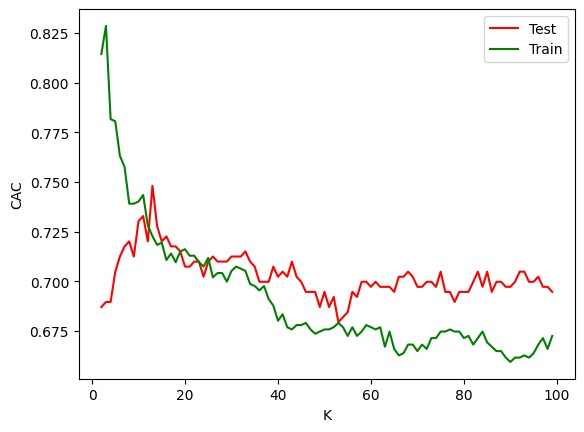

In [ ]:
# Mjesto za Vaš kod
K = range(2,100)
cac_test = []
cac_train = []

for k in K:
    knm = KNeighborsClassifier(n_neighbors=k)
    knm.fit(X_train, y_train)
    y_train_pred = knm.predict(X_train)
    y_test_pred = knm.predict(X_test)
    cac_test.append(accuracy_score(y_test,y_test_pred))
    cac_train.append(accuracy_score(y_train,y_train_pred))

plt.plot(K,cac_test,label="Test", c='red')
plt.plot(K,cac_train,label="Train", c='green')
plt.xlabel("K")
plt.ylabel("CAC")
plt.legend()
plt.show()

## **Zadatak 5: Stablo odluke**

Na podskupu za trening istrenirajte algoritam DT s različitim postavkama za dubinu stabla. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.



In [ ]:
# Mjesto za Vaš kod

for depth in range(1, 15):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)

    dt.fit(X_train, y_train)

    train_preds = dt.predict(X_train)
    test_preds = dt.predict(X_test)

    print("Depth ", depth)
    print("Train: ")
    print("Accuracy: ", accuracy_score(y_train, train_preds))
    print("Precision: ", precision_score(y_train, train_preds))
    print("Recall: ", recall_score(y_train, train_preds))
    print("F1 score: ", f1_score(y_train, train_preds))
    
    print("Test: ")
    print("Accuracy: ", accuracy_score(y_test, test_preds))
    print("Precision: ", precision_score(y_test, test_preds))
    print("Recall: ", recall_score(y_test, test_preds))
    print("F1 score: ", f1_score(y_test, test_preds))
    print(" ")

Depth  1
Train: 
Accuracy:  0.7740174672489083
Precision:  0.7241379310344828
Recall:  0.66
F1 score:  0.6905829596412556
Test: 
Accuracy:  0.7938931297709924
Precision:  0.7346938775510204
Recall:  0.72
F1 score:  0.7272727272727272
 
Depth  2
Train: 
Accuracy:  0.7783842794759825
Precision:  0.7070422535211267
Recall:  0.7171428571428572
F1 score:  0.7120567375886525
Test: 
Accuracy:  0.7938931297709924
Precision:  0.7142857142857143
Recall:  0.7666666666666667
F1 score:  0.7395498392282959
 
Depth  3
Train: 
Accuracy:  0.8034934497816594
Precision:  0.7591463414634146
Recall:  0.7114285714285714
F1 score:  0.7345132743362832
Test: 
Accuracy:  0.8040712468193384
Precision:  0.7417218543046358
Recall:  0.7466666666666667
F1 score:  0.7441860465116278
 
Depth  4
Train: 
Accuracy:  0.8133187772925764
Precision:  0.770392749244713
Recall:  0.7285714285714285
F1 score:  0.7488986784140969
Test: 
Accuracy:  0.8142493638676844
Precision:  0.7583892617449665
Recall:  0.7533333333333333
F1 sc

Iscrtajte ovisnost mjere CAC o dubini stabla za podskupove za trening i test. Koristite linijski dijagram.

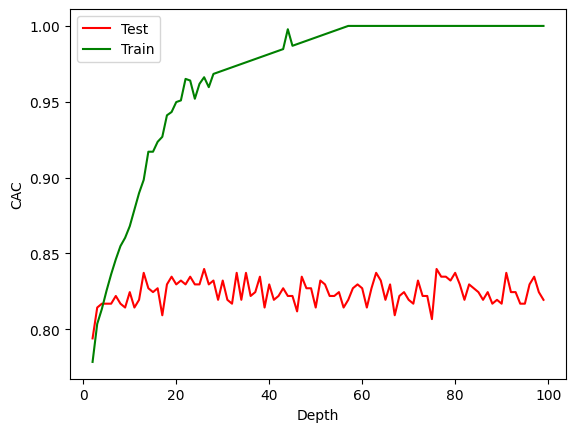

In [ ]:
# Mjesto za Vaš kod
cac_test = []
cac_train = []
depths = range(2,100)

for d in depths:
    dtm = DecisionTreeClassifier(max_depth=d)
    dtm.fit(X_train, y_train)
    y_train_pred = dtm.predict(X_train)
    y_test_pred = dtm.predict(X_test)
    cac_test.append(accuracy_score(y_test,y_test_pred))
    cac_train.append(accuracy_score(y_train,y_train_pred))

plt.plot(depths,cac_test,label="Test", c='red')
plt.plot(depths,cac_train,label="Train", c='green')
plt.xlabel("Depth")
plt.ylabel("CAC")
plt.legend()
plt.show()